In [1]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import numpy as np
import pylab as plt
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca
from begepro.dspro import utils as u

In [2]:
filename='/home/marco/work/tesi/data/228Th-grafico-tesi-im260421_1/WithTrace/228Th-grafico-tesi-im260421_1__0.npy'

coll=ca.NPYreader(filename,True).get_event()
for i in range(5,30,5):
        filename='/home/marco/work/tesi/data/228Th-grafico-tesi-im260421_1/AnalisiBig3/228Th-grafico-tesi-im260421_1__'+str(i)+'.npy'
        temp=ca.NPYreader(filename,False).get_event()

        if(i==5):
            coll_tot=temp
        else:
            coll_tot=coll_tot+temp
            del(temp)
        #print('opened '+str(i))

print('coll events: '+str(coll.n_trace))
print('coll_tot events: '+str(coll_tot.n_trace))

/home/marco/work/tesi/data/228Th-grafico-tesi-im260421_1/WithTrace/228Th-grafico-tesi-im260421_1
coll events: 136889
coll_tot events: 3559114


In [3]:
traces=coll.get_traces()

<IPython.core.display.Javascript object>


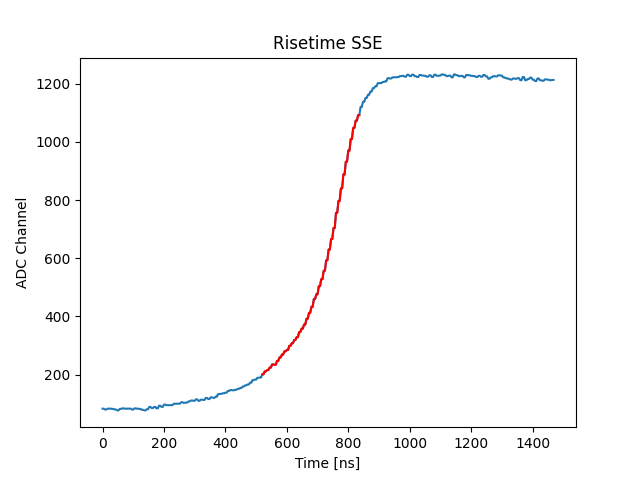

Text(0, 0.5, 'ADC Channel')

In [4]:
plt.figure()

time=np.arange(0,len(traces[0]),1)*4
plt.plot(time,traces[0,:])

plt.title('Risetime SSE')
plt.xlabel('Time [ns]',loc='center')
plt.ylabel('ADC Channel',loc='center')

In [5]:
rtobj=u.rise_time()
res=rtobj.compute_rt2(traces[0],4)
plt.plot(time[res[1][0] : res[1][1]],traces[0][res[1][0] : res[1][1]],color='r')

<IPython.core.display.Javascript object>


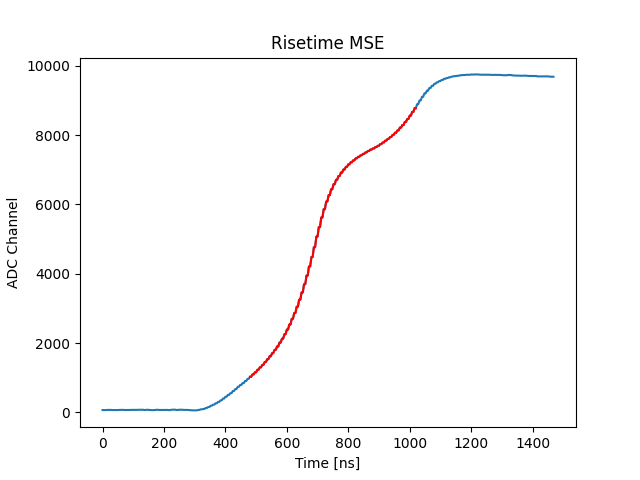

Text(0, 0.5, 'ADC Channel')

In [6]:
plt.figure()
time=np.arange(0,len(traces[10]),1)*4
plt.plot(time,traces[10,:])

plt.title('Risetime MSE')
plt.xlabel('Time [ns]',loc='center')
plt.ylabel('ADC Channel',loc='center')

In [7]:
rtobj=u.rise_time()
res=rtobj.compute_rt2(traces[10],4)
plt.plot(time[res[1][0] : res[1][1]],traces[10][res[1][0] : res[1][1]],color='r')

In [8]:
#Cut ae to see if between SSE and MSE persists a difference in risetime

coll_SSE=((coll_tot.subset('energy',0,1618)+coll_tot.subset('energy',1626,2098)+coll_tot.subset('energy',2110,2608)+coll_tot.subset('energy',2618)).subset('ae',1.90e-2,1.95e-2)).subset('energy',1550)
coll_MSE=((coll_tot.subset('energy',0,1590)+coll_tot.subset('energy',1597)).subset('ae',0,1.6e-2)).subset('energy',1550)

rt1=coll_MSE.get_risetime()
rt2=coll_SSE.get_risetime()

coll_SSE2=((coll_tot.subset('energy',0,1618)+coll_tot.subset('energy',1626,2098)+coll_tot.subset('energy',2110,2608)+coll_tot.subset('energy',2618)).subset('ae',1.90e-2,1.95e-2))
coll_MSE2=((coll_tot.subset('energy',0,1590)+coll_tot.subset('energy',1597)).subset('ae',0,1.6e-2))

rt3=coll_MSE2.get_risetime()
rt4=coll_SSE2.get_risetime()

<IPython.core.display.Javascript object>


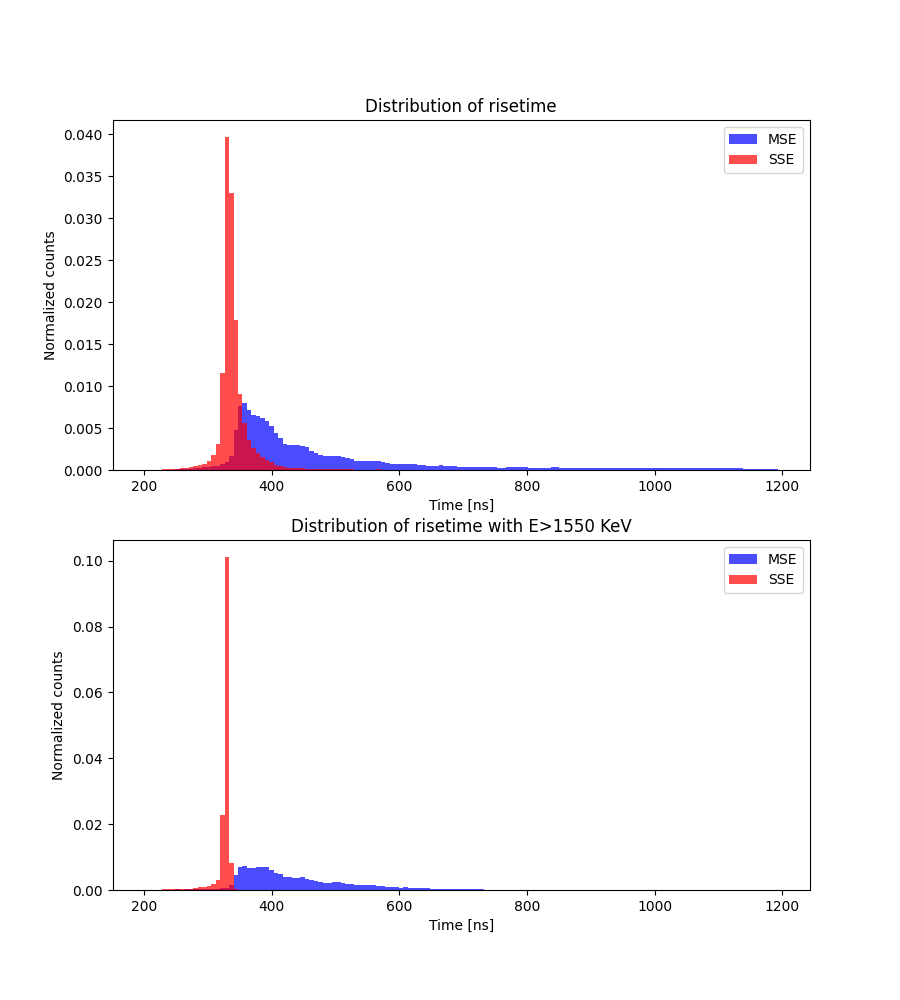

In [9]:
time=np.arange(200,1200,7)
fig,axs=plt.subplots(2,figsize=(9,10))
axs[0].hist(rt3*1e9,color='b',alpha=0.7,bins=time,density=True,label='MSE')
axs[0].hist(rt4*1e9,color='r',alpha=0.7,bins=time,density=True,label='SSE')
axs[0].set_title('Distribution of risetime')

axs[1].hist(rt1*1e9,color='b',alpha=0.7,bins=time,density=True,label='MSE')
axs[1].hist(rt2*1e9,color='r',alpha=0.7,bins=time,density=True,label='SSE')
axs[1].set_title('Distribution of risetime with E>1550 KeV')

axs[0].set(xlabel='Time [ns]')
axs[1].set(xlabel='Time [ns]')
axs[0].set(ylabel='Normalized counts')
axs[1].set(ylabel='Normalized counts')
axs[0].legend()
axs[1].legend()


<IPython.core.display.Javascript object>


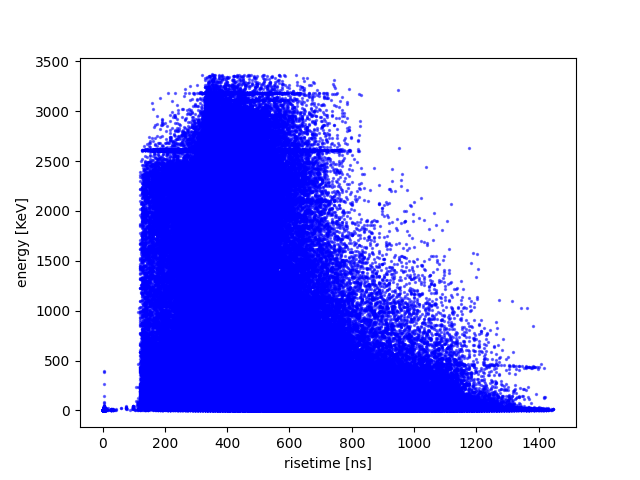

Text(0, 0.5, 'energy [KeV]')

In [10]:
#Scatter plot
plt.figure()
plt.scatter(coll_tot.get_risetime()*10e8,coll_tot.get_energies(),s=2,alpha=0.5,color='b')
plt.show()

plt.xlabel('risetime [ns]')
plt.ylabel('energy [KeV]')